In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier

In [11]:
bank=pd.read_csv('Bank Dataset.csv')

In [12]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
bank.drop(['ID','ZIP_Code'],axis=1,inplace=True)

In [14]:
bank.head()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [15]:
bank.isnull().sum()

Age                   0
Experience            0
Income                0
Family_members        0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [16]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4982 non-null   int64  
 1   Experience          4982 non-null   int64  
 2   Income              4982 non-null   int64  
 3   Family_members      4982 non-null   int64  
 4   CCAvg               4982 non-null   float64
 5   Education           4982 non-null   int64  
 6   Mortgage            4982 non-null   int64  
 7   Personal_Loan       4982 non-null   int64  
 8   Securities_Account  4982 non-null   int64  
 9   CD_Account          4982 non-null   int64  
 10  Online              4982 non-null   int64  
 11  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 467.2 KB


In [17]:
bank.describe()

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,4982.000000,4982.000000,4982.000000,4982.00000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000,4982.000000
mean,45.327178,20.096146,73.732637,2.39723,1.939962,1.880971,56.546367,0.095945,0.104175,0.060217,0.595945,0.294059
std,11.470821,11.475636,46.040144,1.14716,1.748566,0.839740,101.756369,0.294546,0.305518,0.237912,0.490757,0.455664
min,23.000000,-3.000000,8.000000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,1.00000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,2.00000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,3.00000,2.500000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,43.000000,224.000000,4.00000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x=bank.drop(['Personal_Loan'],axis=1)
y=bank.pop('Personal_Loan') 


In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=27)

The below step shows how to scale our data

In [21]:
#SCALED INFORMATION FOR TRAINING DATA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[ 0.22702424,  0.15893175,  1.41450874, ...,  3.92057292,
         0.83032402,  1.55627193],
       [-0.99936387, -0.89167492,  0.78275964, ..., -0.25506476,
         0.83032402, -0.64256122],
       [-0.64896727, -0.54147269, -0.76393643, ..., -0.25506476,
         0.83032402, -0.64256122],
       ...,
       [-0.38616981, -0.27882103, -0.06683397, ..., -0.25506476,
         0.83032402,  1.55627193],
       [-0.29857066, -0.19127047, -1.13427211, ..., -0.25506476,
         0.83032402, -0.64256122],
       [ 1.7162098 ,  1.73484175,  0.95703526, ...,  3.92057292,
         0.83032402,  1.55627193]])

In [22]:
x_test=sc.transform(x_test)

In [23]:
x_test

array([[-1.34976047e+00, -1.41697825e+00,  1.29226092e-01, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.47219008e+00, -1.39568553e+00, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-1.52495877e+00, -1.50452880e+00, -1.48061803e-03, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       ...,
       [-2.10971513e-01, -1.91270471e-01, -7.85720880e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01],
       [-2.98570664e-01, -1.91270471e-01,  1.54521545e+00, ...,
        -2.55064762e-01, -1.20434911e+00, -6.42561224e-01],
       [ 1.45341235e+00,  1.38463953e+00, -3.06462942e-01, ...,
        -2.55064762e-01,  8.30324024e-01, -6.42561224e-01]])

In [24]:
clf=MLPClassifier(hidden_layer_sizes=(100),max_iter=500,
                 solver='sgd',verbose=True,random_state=21,tol=0.01) 

In [25]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test) 

Iteration 1, loss = 0.64337742
Iteration 2, loss = 0.57200145
Iteration 3, loss = 0.50925782
Iteration 4, loss = 0.46310156
Iteration 5, loss = 0.42893914
Iteration 6, loss = 0.40240410
Iteration 7, loss = 0.38109913
Iteration 8, loss = 0.36349894
Iteration 9, loss = 0.34854138
Iteration 10, loss = 0.33552069
Iteration 11, loss = 0.32394017
Iteration 12, loss = 0.31366579
Iteration 13, loss = 0.30439043
Iteration 14, loss = 0.29594532
Iteration 15, loss = 0.28805189
Iteration 16, loss = 0.28083580
Iteration 17, loss = 0.27416434
Iteration 18, loss = 0.26794322
Iteration 19, loss = 0.26211477
Iteration 20, loss = 0.25668754
Iteration 21, loss = 0.25157118
Iteration 22, loss = 0.24682533
Iteration 23, loss = 0.24234252
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [26]:
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
confusion_matrix(y_test,y_pred)

array([[1354,    0],
       [ 136,    5]], dtype=int64)

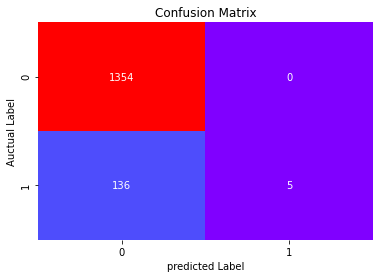

In [28]:
confusion_matrix(y_test,y_pred) 
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False,cmap='rainbow') 
plt.xlabel( 'predicted Label') 
plt.ylabel('Auctual Label')
plt.title('Confusion Matrix')
plt.show()


In [29]:
y_pred1 = clf.predict(x_train)

In [30]:
clf.score(x_train,y_train)

0.9065098938915973

In [31]:
clf.score(x_test,y_test)

0.9090301003344482

In [20]:
confusion_matrix(y_train,y_pred1)

array([[3148,    2],
       [ 324,   13]], dtype=int64)

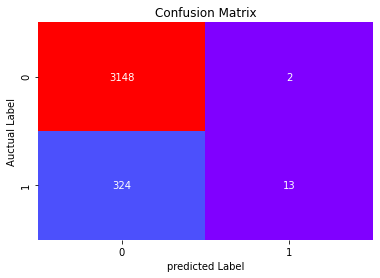

In [25]:
confusion_matrix(y_train,y_pred1) 
sns.heatmap(confusion_matrix(y_train,y_pred1),annot=True,fmt='d',cbar=False,cmap='rainbow') 
plt.xlabel( 'predicted Label') 
plt.ylabel('Auctual Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1354
           1       1.00      0.04      0.07       141

    accuracy                           0.91      1495
   macro avg       0.95      0.52      0.51      1495
weighted avg       0.92      0.91      0.87      1495



In [22]:
print(classification_report(y_train,y_pred1))  

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3150
           1       0.87      0.04      0.07       337

    accuracy                           0.91      3487
   macro avg       0.89      0.52      0.51      3487
weighted avg       0.90      0.91      0.87      3487



In [23]:
import matplotlib.pyplot as plt

AUC: 0.913


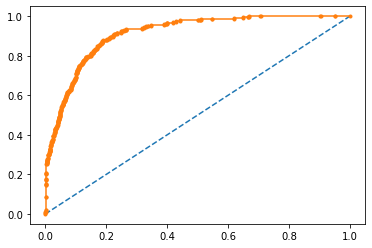

In [27]:
#AUC and ROC for training data

#predict probability
probs= clf.predict_proba(x_train)

#keep probability for positive outcome only
probs = probs[:,1]

#AUC calculation
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' %auc)

#calculate ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle='--')

#plot the roc curve
plt.plot(fpr,tpr,marker='.')

plt.show()



AUC: 0.924


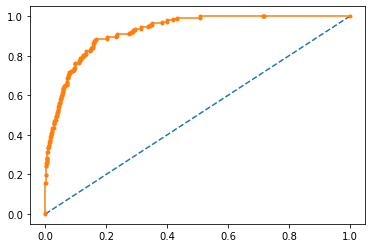

In [28]:
#AUC and ROC for training data

#predict probability
probs= clf.predict_proba(x_test)

#keep probability for positive outcome only
probs = probs[:,1]

#AUC calculation
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,probs)
print('AUC: %.3f' %auc)

#calculate ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,probs)
plt.plot([0,1],[0,1],linestyle='--')

#plot the roc curve
plt.plot(fpr,tpr,marker='.')

plt.show()